# Bank Attrition Analysis

<img src = 'https://media.bizj.us/view/img/5998141/exterior-bank-generic*1200xx4368-2469-0-434.jpg'>

Index: 

- Data Preperation
- Attrition Analysis
- Correlations with Credit Limit
- Utilization Analysis
- Recommendations

# Data Preparation

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [15]:
df = pd.read_csv('BankChurners1.csv')

In [16]:
del df['Unnamed: 21']

In [17]:
df.set_index('CLIENTNUM', inplace=True)

In [18]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14 

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [82]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,total_trans_amt_group,total_trans_ct_group,Months_on_book_group
count,10127,10127,10127,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4,3,3,3
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue,$0 - $4999 Transaction Amount,50 - 99 Transactions,25 - 36 months
freq,8500,5358,3128,4687,3561,9436,8236,6403,5418


# Attrition Analysis

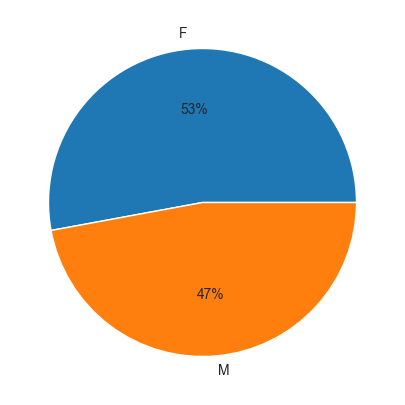

In [70]:
gender_prop = df['Gender'].value_counts(normalize=True)
plt.pie(gender_prop, labels=gender_prop.index, autopct='%.0f%%')
plt.show()

53% of the customers are female compared 47% being male

In [25]:
df['Attrition_Binary'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df['Attrition_Binary'].value_counts()


Attrition_Binary
0    8500
1    1627
Name: count, dtype: int64

In [26]:
df.Attrition_Binary.mean()

0.1606596227905599

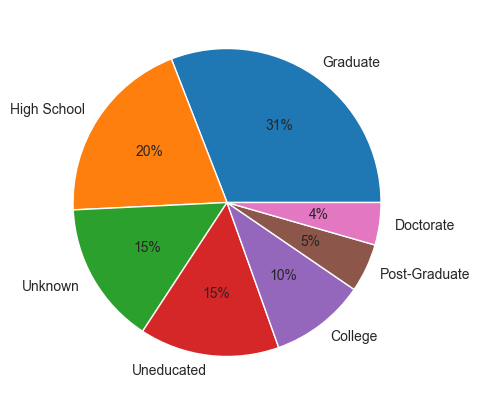

In [71]:
total_edu = df['Education_Level'].value_counts()
plt.pie(total_edu, labels=total_edu.index, autopct='%.0f%%')
plt.show()

In [27]:
education_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate',
       'Post-Graduate', 'Doctorate']

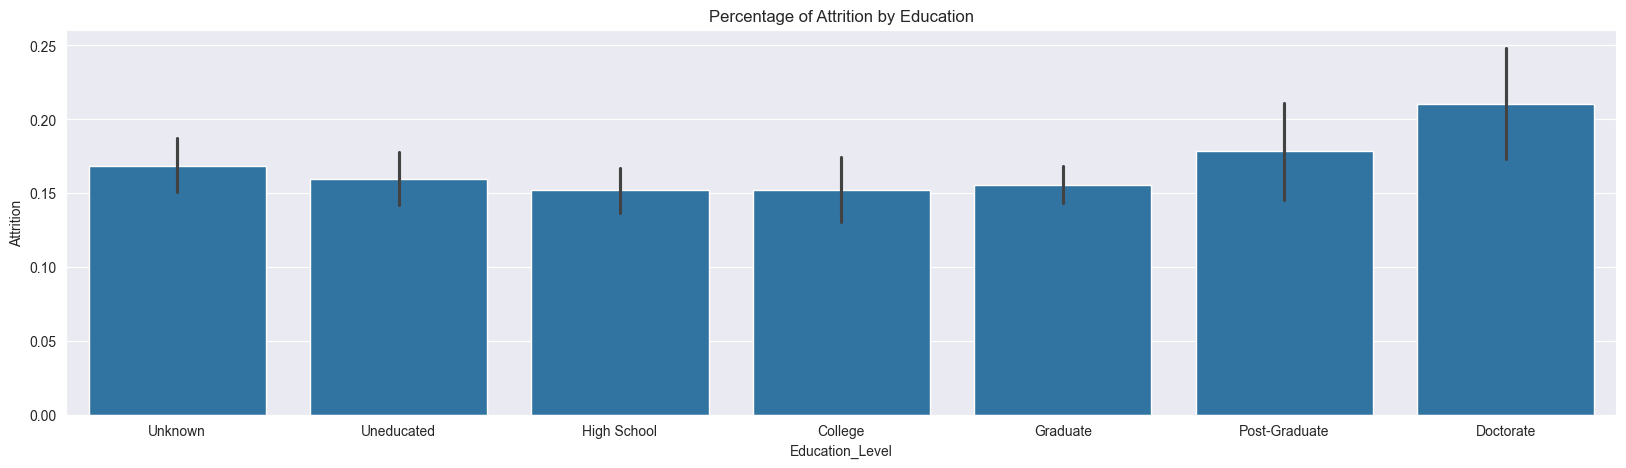

In [28]:
edu = sns.barplot(x='Education_Level', y='Attrition_Binary', data=df, order=education_order)
plt.ylabel("Attrition")
plt.title("Percentage of Attrition by Education")
plt.show()

While Doctorate level customers have the highest level of attrition, they only make up 4% of the banks customers

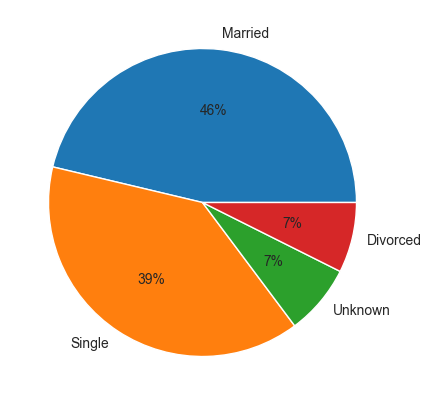

In [72]:
marital = df["Marital_Status"].value_counts()
plt.pie(marital, labels=marital.index, autopct='%.0f%%')
plt.show()

In [29]:
marital_order = ['Unknown', 'Single', 'Married', 'Divorced']

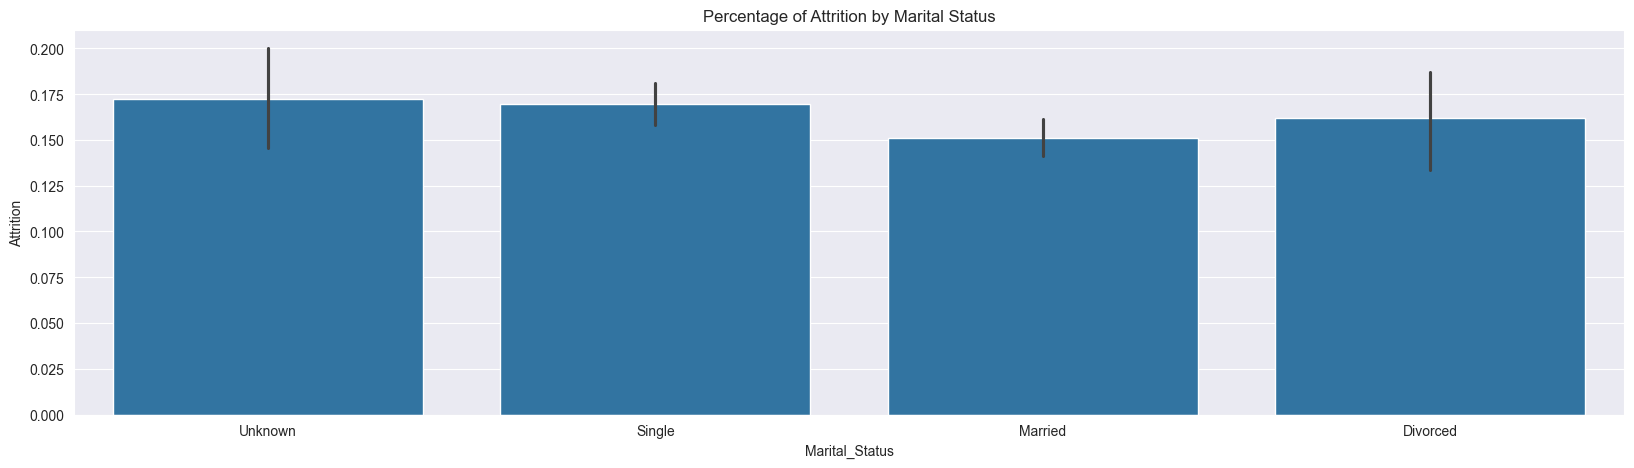

In [30]:
marital = sns.barplot(x='Marital_Status', y='Attrition_Binary', data=df, order=marital_order)
plt.ylabel("Attrition")
plt.title("Percentage of Attrition by Marital Status")
plt.show()

Unknown and single customers have the highest levels of attrition at ~16.5%

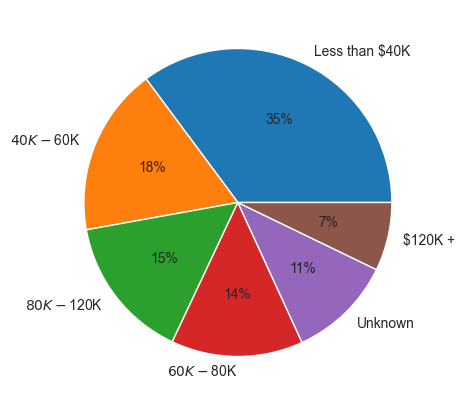

In [73]:
income = df['Income_Category'].value_counts()
plt.pie(income, labels=income.index, autopct='%.0f%%')
plt.show()

In [31]:
income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

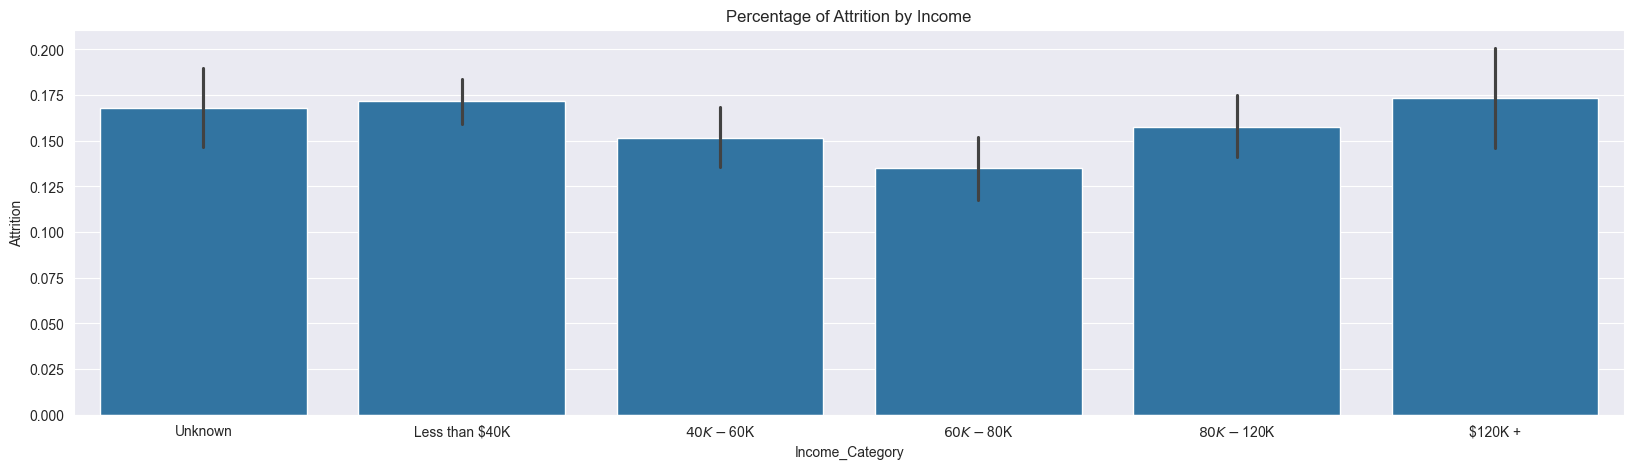

In [32]:
attrition_pct = sns.barplot(x='Income_Category', y='Attrition_Binary', data=df, order=income_order)
plt.ylabel("Attrition")
plt.title("Percentage of Attrition by Income")
plt.show()

Those with incomes of Unknown, Less than 40K, and 120K+ are attriting at the highest percent. However, individuals with an income of 120K+ make up 7% of the customers and Unknown make up 11%. Those with an income of Less than 40K make up 35% of the total customers.

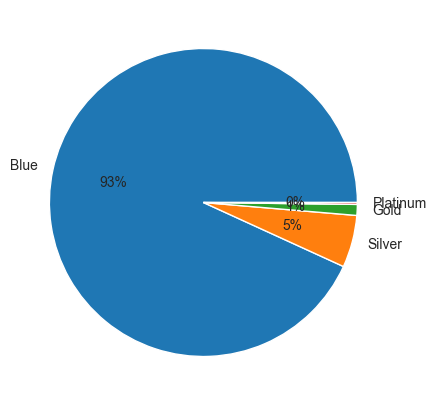

In [77]:
card = df['Card_Category'].value_counts()
plt.pie(card, labels=card.index, autopct='%.0f%%')
plt.show()

93% of the banks customers are Blue card holders

In [78]:
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

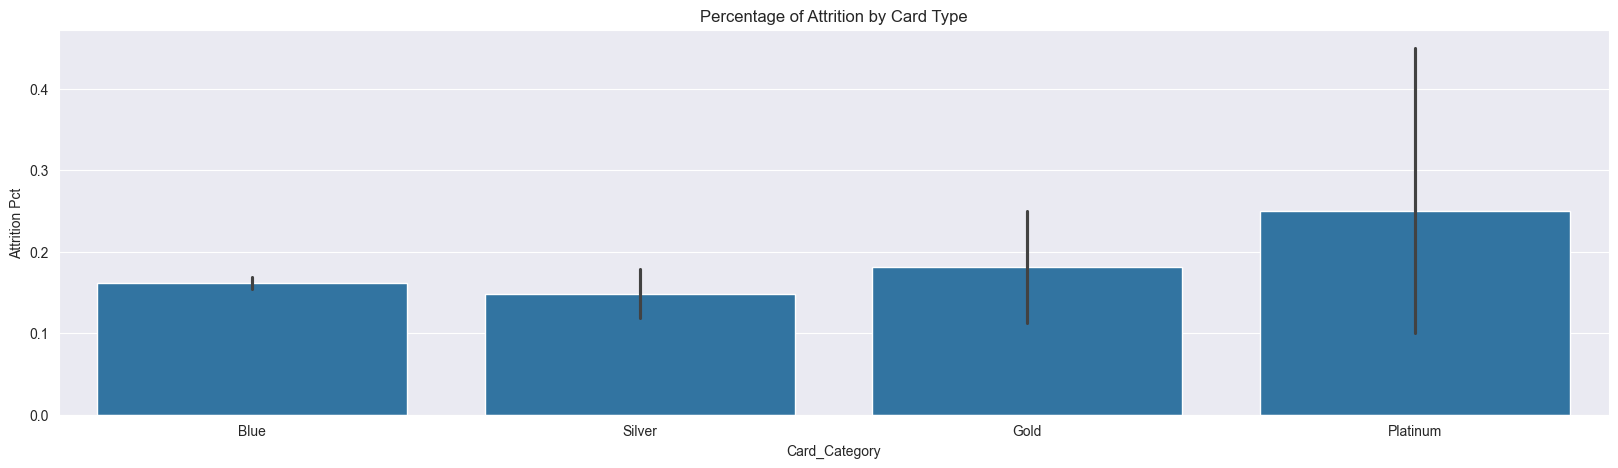

In [79]:
card_cat = sns.barplot(x='Card_Category', y='Attrition_Binary', data=df, order=card_order)
plt.ylabel("Attrition Pct")
plt.title("Percentage of Attrition by Card Type")
plt.show()

While Platinum card holders have the highest levels of attrition, they only make up 1% of the banks customers. Blue card holders will be the primary focus of this analysis given they make up 93& of the banks customers.

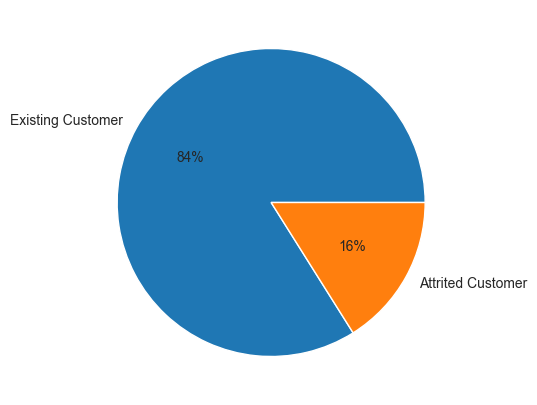

In [81]:
attr_flag = df['Attrition_Flag'].value_counts()
plt.pie(attr_flag, labels=attr_flag.index, autopct='%.0f%%')
plt.show()

Overall, 16% of the banks have attrited. In the next sections, I'll be going through correlating factors. 

# Correlations with Credit Limit

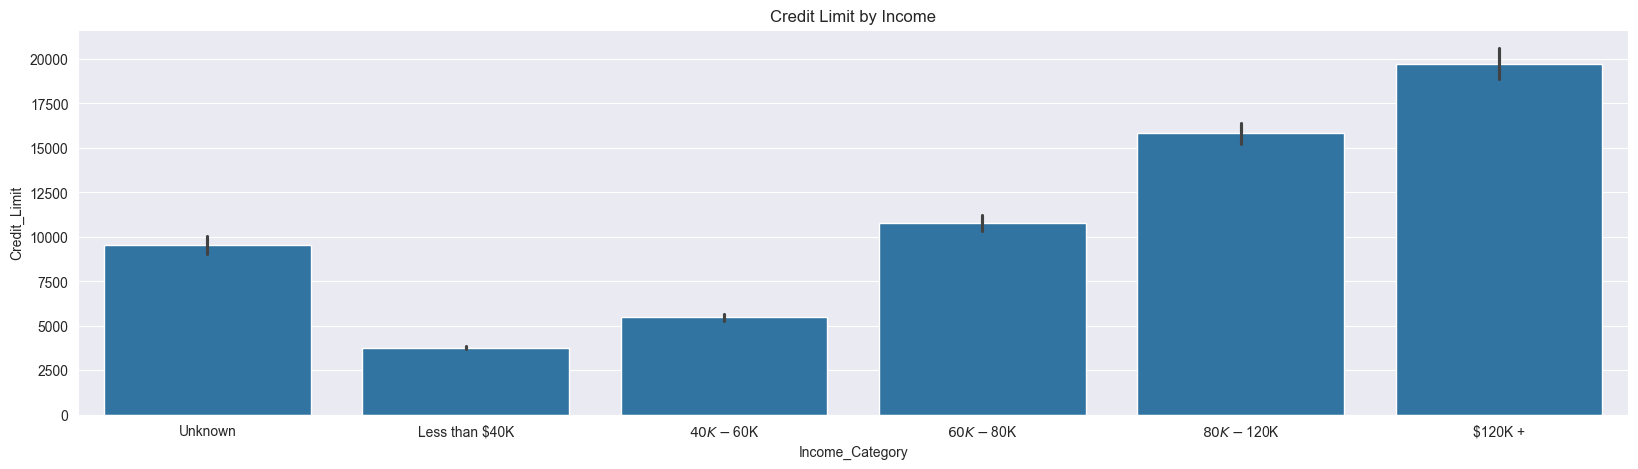

In [33]:
income_to_cl = sns.barplot(x='Income_Category', y='Credit_Limit', data=df, order=income_order)
plt.title("Credit Limit by Income")
plt.show()

Individuals making less than 40K have the lowest credit limit

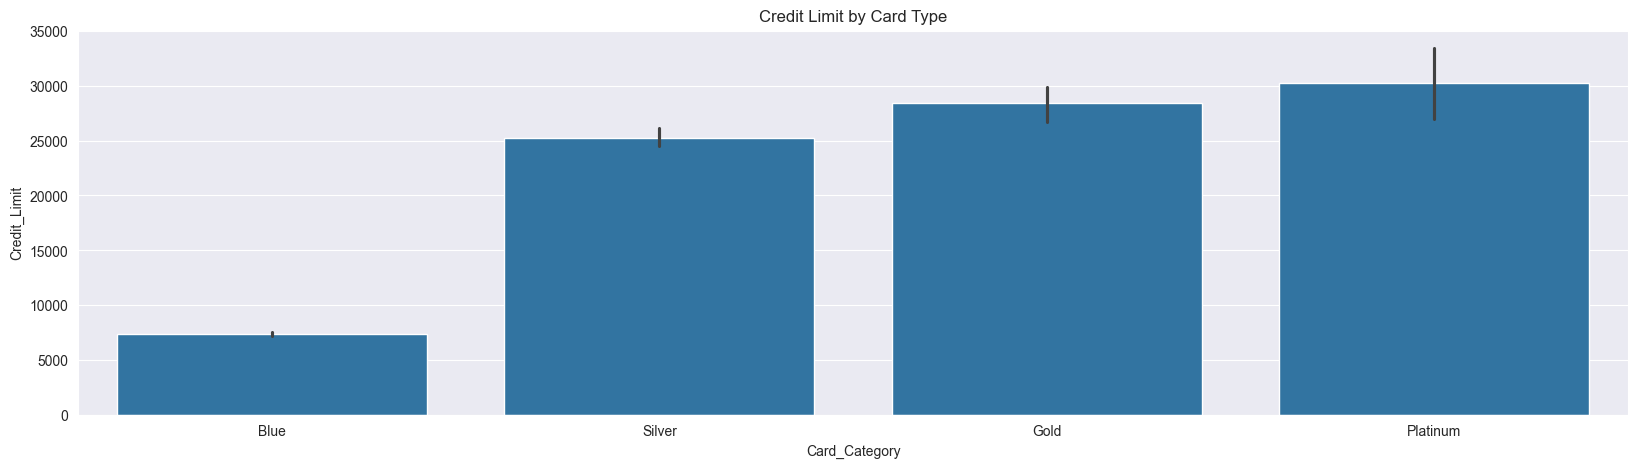

In [80]:
card_cl = sns.barplot(x='Card_Category', y='Credit_Limit', data=df, order=card_order)
plt.title("Credit Limit by Card Type")
plt.show()

Blue card holders make 93% of the banks customers and have an average credit limit of ~7500

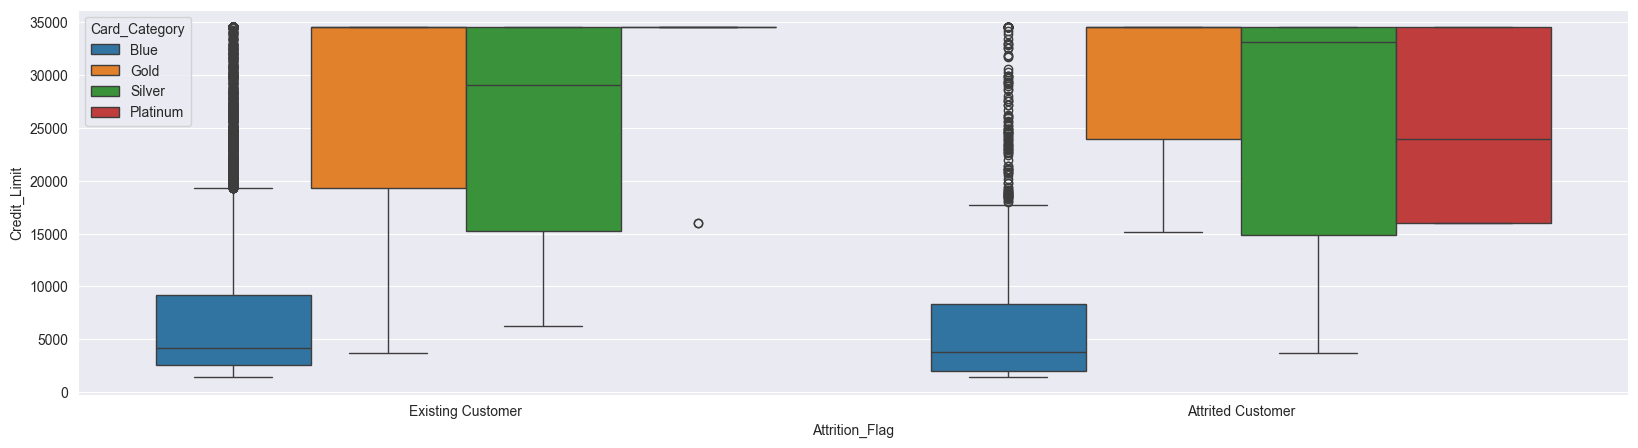

In [37]:
cl_attr = sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit', hue='Card_Category')

Overall, there isn't a direct correlation between credit limit and attrition.

# Utilization Analysis

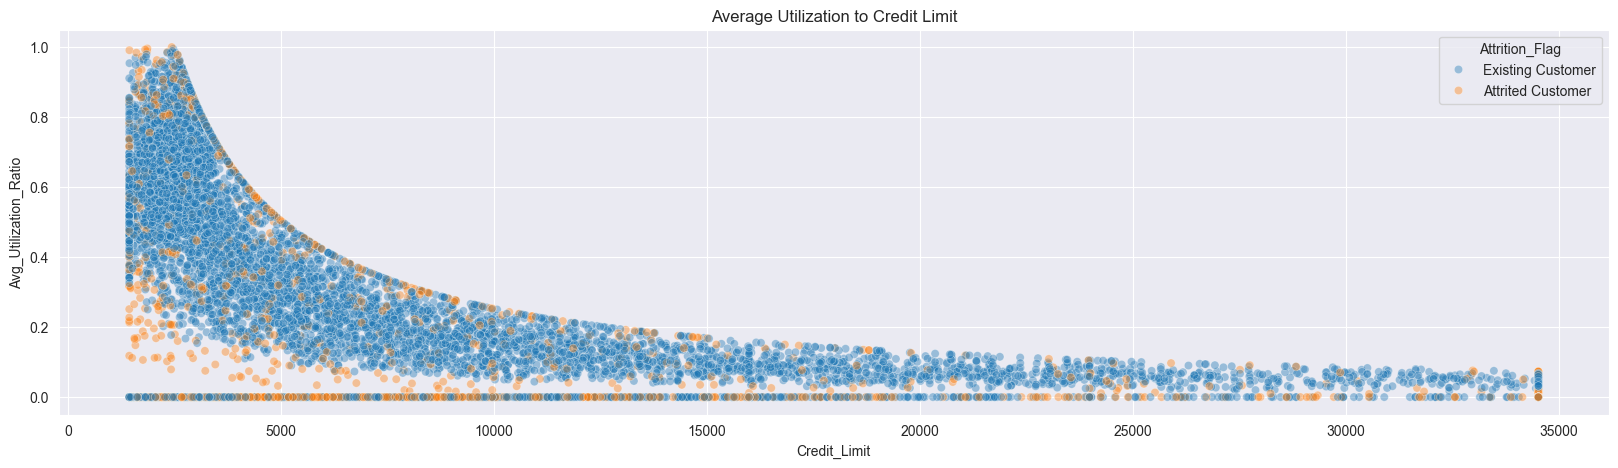

In [38]:
card_use = sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', alpha=0.4)
plt.title("Average Utilization to Credit Limit")
plt.show()

Breaking down utilization to credit limit to help visualize how these factors influence attrition.

In [39]:
df['Avg_Utilization_Ratio_Bin'] = pd.cut(df['Avg_Utilization_Ratio'], 
                                         bins=np.arange(0.00, 1.05, .05), 
                                         labels=[0, 0.05, 0.1, 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
                                                 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
                                         include_lowest=True)
df[['Avg_Utilization_Ratio_Bin', 'Avg_Utilization_Ratio']].head()

,Avg_Utilization_Ratio_Bin,Avg_Utilization_Ratio
CLIENTNUM,,
768805383,0.05,0.061
818770008,0.10,0.105
713982108,0.00,0.000
769911858,0.75,0.760
709106358,0.00,0.000


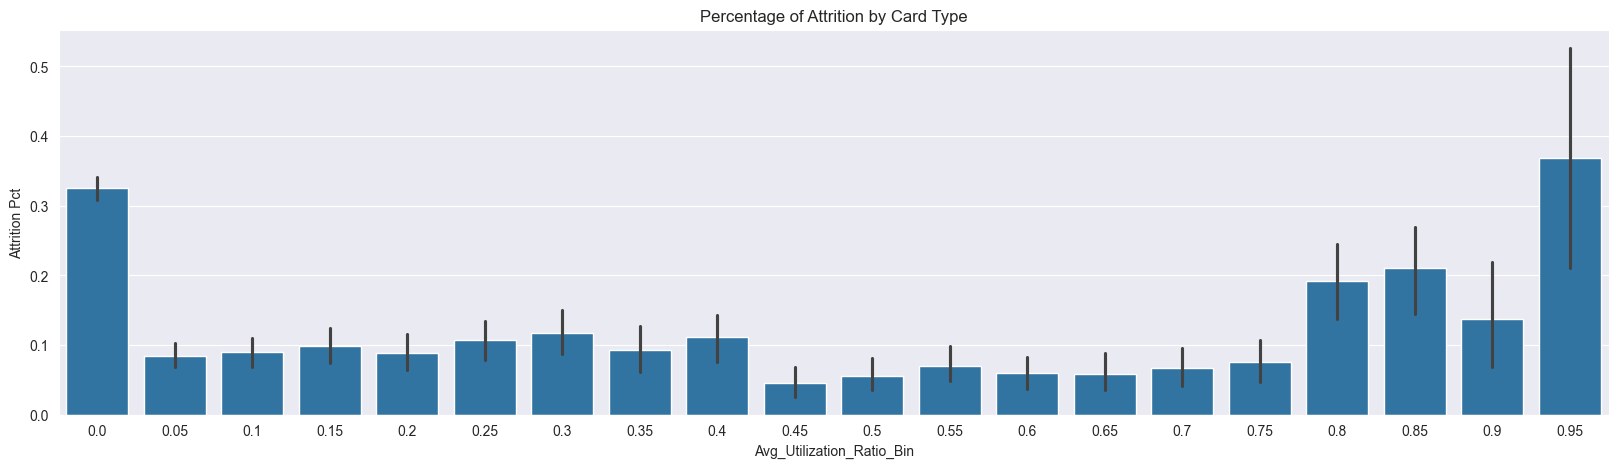

In [40]:
card_cat = sns.barplot(x='Avg_Utilization_Ratio_Bin', y='Attrition_Binary', data=df)
plt.ylabel("Attrition Pct")
plt.title("Percentage of Attrition by Card Type")
plt.show()

Those in the 0 and 80th percentiles of utilization are attriting at a much higher percent of than the rest.

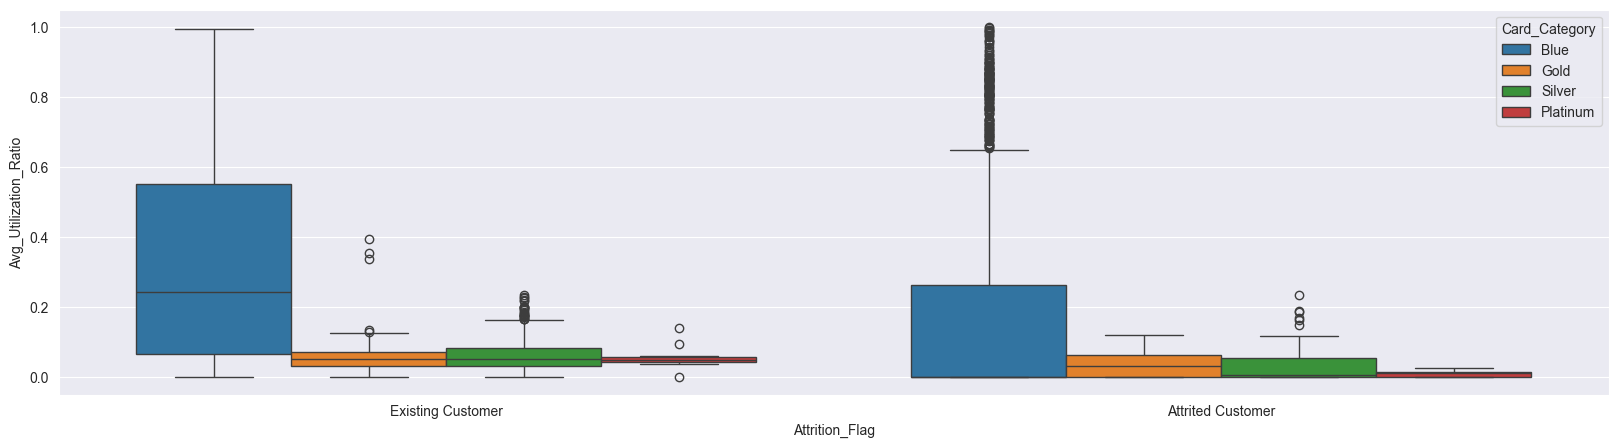

In [41]:
util_attrit = sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio', hue='Card_Category')

Blue card holders with a low average utilization are attriting at a higher percent than those who utilize their card. The differential for the other card holders are slim to none.

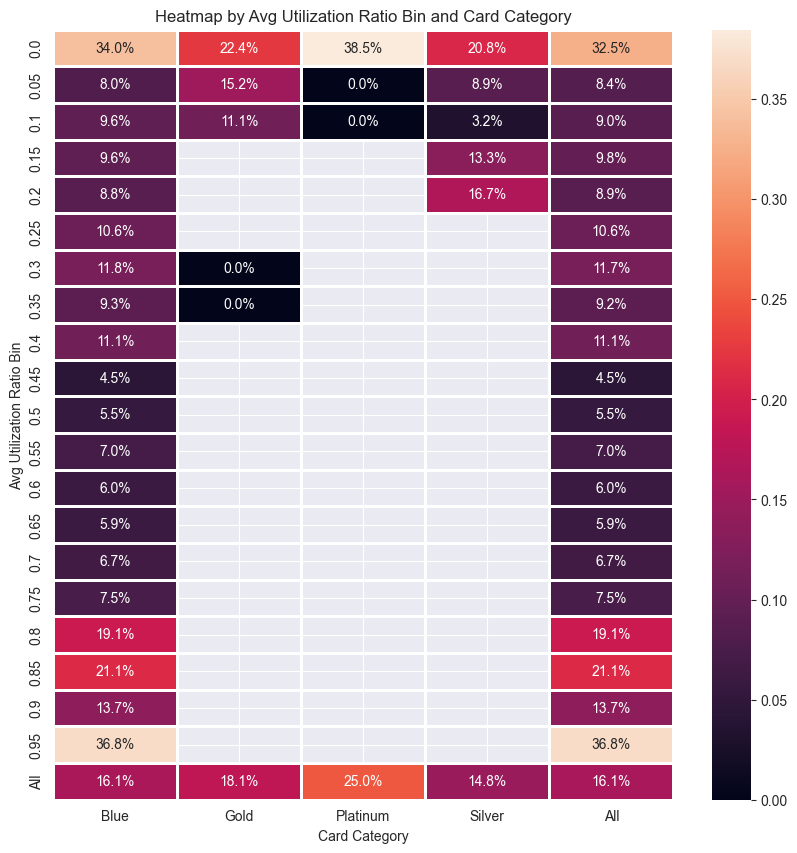

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
a = pd.crosstab(df['Avg_Utilization_Ratio_Bin'], df['Card_Category'], df['Attrition_Binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Avg Utilization Ratio Bin')
plt.xlabel('Card Category')
plt.title('Heatmap by Avg Utilization Ratio Bin and Card Category')
plt.show()

This heatmap further emphasizes previous points that attrition is at it's highest when card holders are utilizing their cards at the 0 and 80th+ percentile.

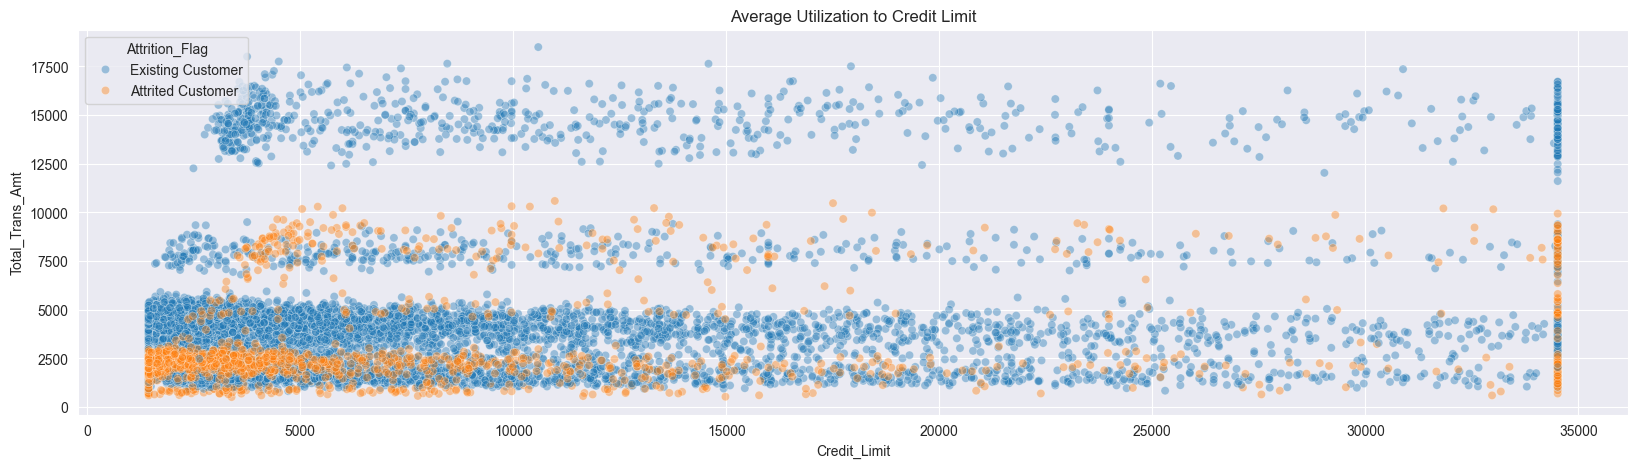

In [43]:
card_use1 = sns.scatterplot(data=df, x='Credit_Limit', y='Total_Trans_Amt', hue='Attrition_Flag', alpha=0.4)
plt.title("Average Utilization to Credit Limit")
plt.show()

There seems to be a direct correlation between a low transaction amount to attrition.

In [44]:
def total_trans_amt_group(row):
    if row < 5000:
        result = '$0 - $4999 Transaction Amount'
    elif row < 10000:
        result = '$5000 - $9999 Transaction Amount'
    else:
        result = '$10000+ Transaction Amount'
    return result
df['total_trans_amt_group'] = df['Total_Trans_Amt'].apply(total_trans_amt_group)
df.groupby('total_trans_amt_group')['Attrition_Binary'].mean()

total_trans_amt_group
$0 - $4999 Transaction Amount       0.166464
$10000+ Transaction Amount          0.013210
$5000 - $9999 Transaction Amount    0.216931
Name: Attrition_Binary, dtype: float64

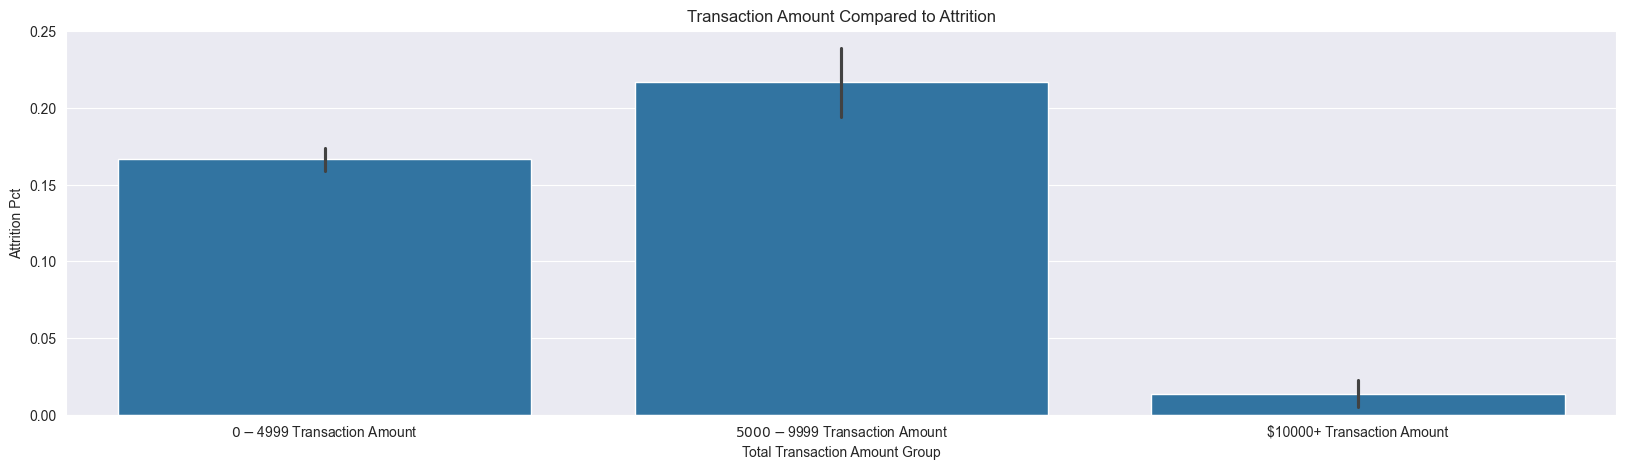

In [45]:
trans_attrit = sns.barplot(data=df, x='total_trans_amt_group', y='Attrition_Binary')
plt.xlabel("Total Transaction Amount Group")
plt.ylabel("Attrition Pct")
plt.title("Transaction Amount Compared to Attrition")
plt.show()

Individuals with transaction amounts between 0 - 10,000 are attriting between ~16 - 22% respectively. 

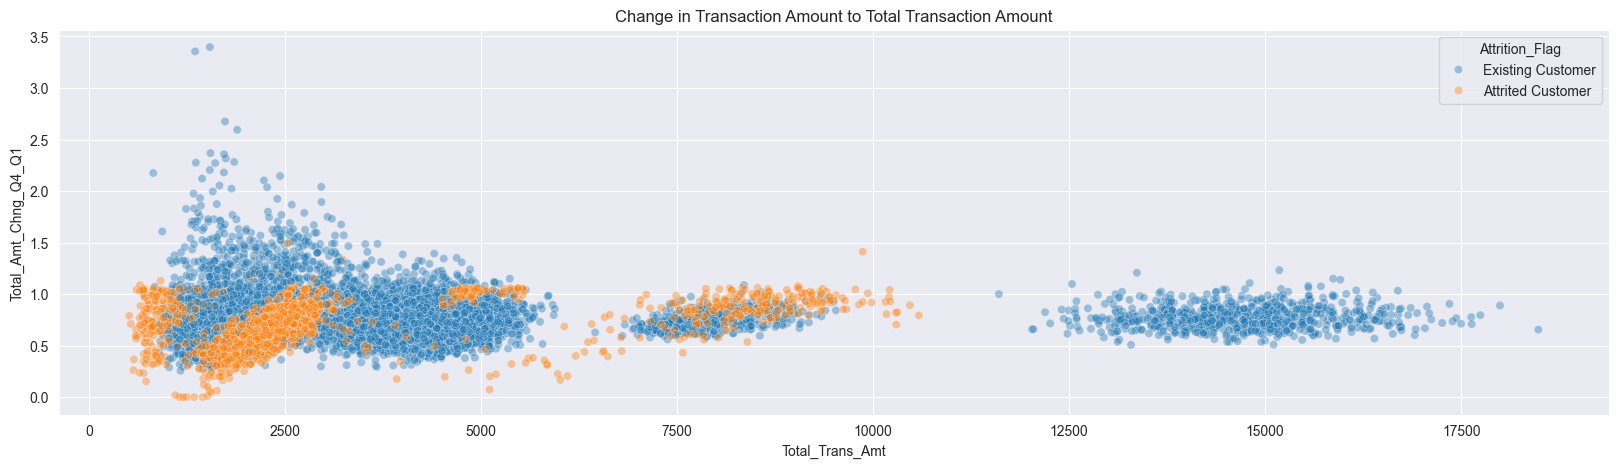

In [46]:
amt_chng = sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', alpha=0.4)
plt.title("Change in Transaction Amount to Total Transaction Amount")
plt.show()

In [47]:
df['total_amt_chng_Q4_Q1_bin'] = pd.cut(df['Total_Amt_Chng_Q4_Q1'], 
                                         bins=np.arange(0.0, 4.5, .5), 
                                         labels=[0, .5, 1, 1.5, 2, 2.5, 3, 3.5],
                                         include_lowest=True)
df[['total_amt_chng_Q4_Q1_bin', 'Total_Trans_Amt']].head()

,total_amt_chng_Q4_Q1_bin,Total_Trans_Amt
CLIENTNUM,,
768805383,1.0,1144
818770008,1.5,1291
713982108,2.5,1887
769911858,1.0,1171
709106358,2.0,816


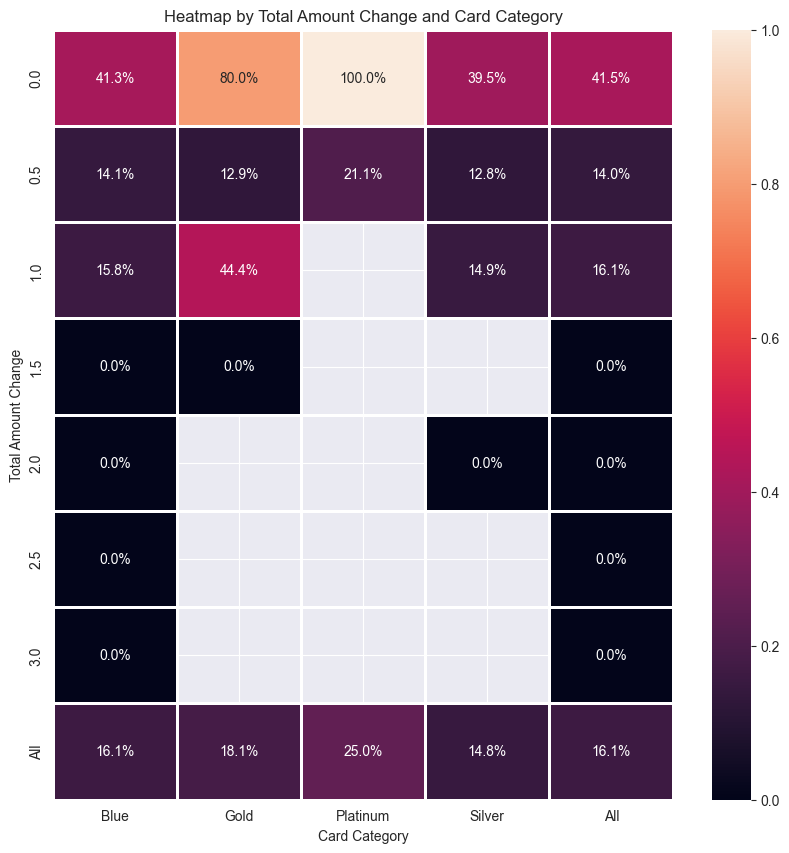

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
a = pd.crosstab(df['total_amt_chng_Q4_Q1_bin'], df['Card_Category'], df['Attrition_Binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Total Amount Change')
plt.xlabel('Card Category')
plt.title('Heatmap by Total Amount Change and Card Category')
plt.show()

Individuals with a total amount change between 0 - .49 are attriting at an overall 41.5%.

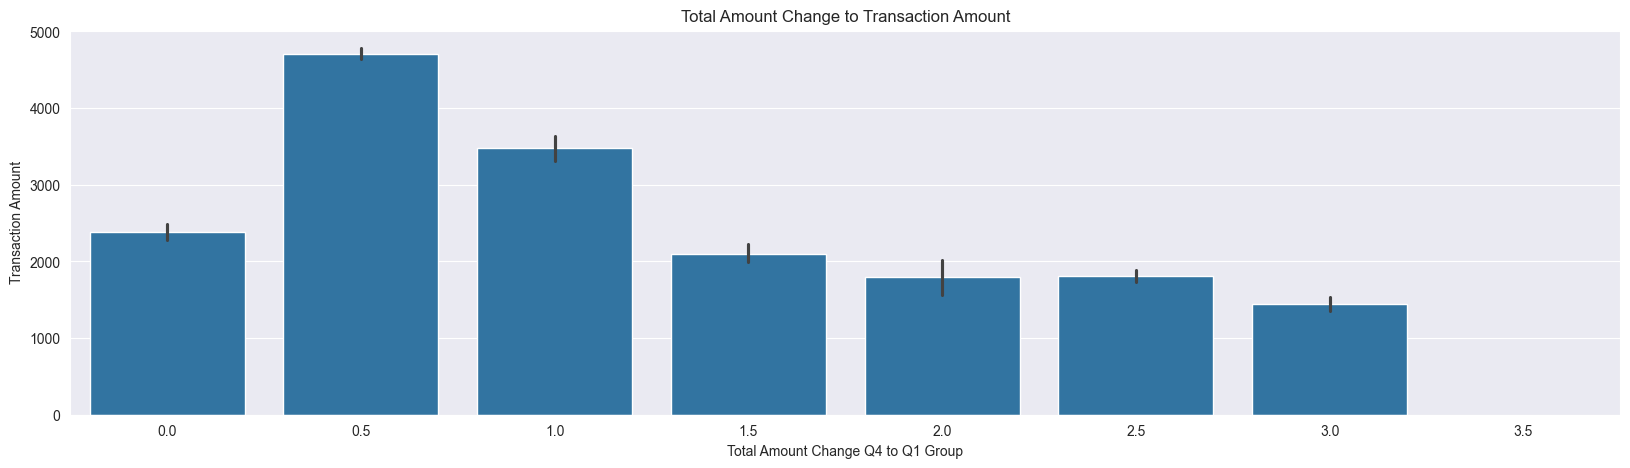

In [49]:
sns.barplot(x='total_amt_chng_Q4_Q1_bin', y='Total_Trans_Amt', data=df)
plt.xlabel("Total Amount Change Q4 to Q1 Group")
plt.ylabel("Transaction Amount")
plt.title("Total Amount Change to Transaction Amount")
plt.show()

In [50]:
df['total_trans_amt_bin'] = pd.cut(df['Total_Trans_Amt'], 
                                         bins=np.arange(0.0, 20000, 1000), 
                                         labels=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 
                                                 13000, 14000, 15000, 16000, 17000, 18000],
                                         include_lowest=True)
df[['total_trans_amt_bin', 'Total_Trans_Amt']].head()

,total_trans_amt_bin,Total_Trans_Amt
CLIENTNUM,,
768805383,1000,1144
818770008,1000,1291
713982108,1000,1887
769911858,1000,1171
709106358,0,816


In [51]:
xx = pd.crosstab(df['total_amt_chng_Q4_Q1_bin'], df['total_trans_amt_bin'], values=df['Attrition_Binary'], aggfunc='mean')
xx

total_trans_amt_bin,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000
total_amt_chng_Q4_Q1_bin,,,,,,,,,,,,,,,,,,,
0.0,0.900000,0.425000,0.780952,0.062500,0.030928,0.571429,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,0.880734,0.107815,0.547935,0.021515,0.007786,0.007895,0.529412,0.155689,0.314516,0.680851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.952381,0.048077,0.105882,0.027778,0.183544,0.444444,NaN,1.000000,0.857143,1.000000,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1.5,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's a direct correlation to total amount change and transaction amount regarding attrition. Those with low or high figures are attriting at a higher percentage.

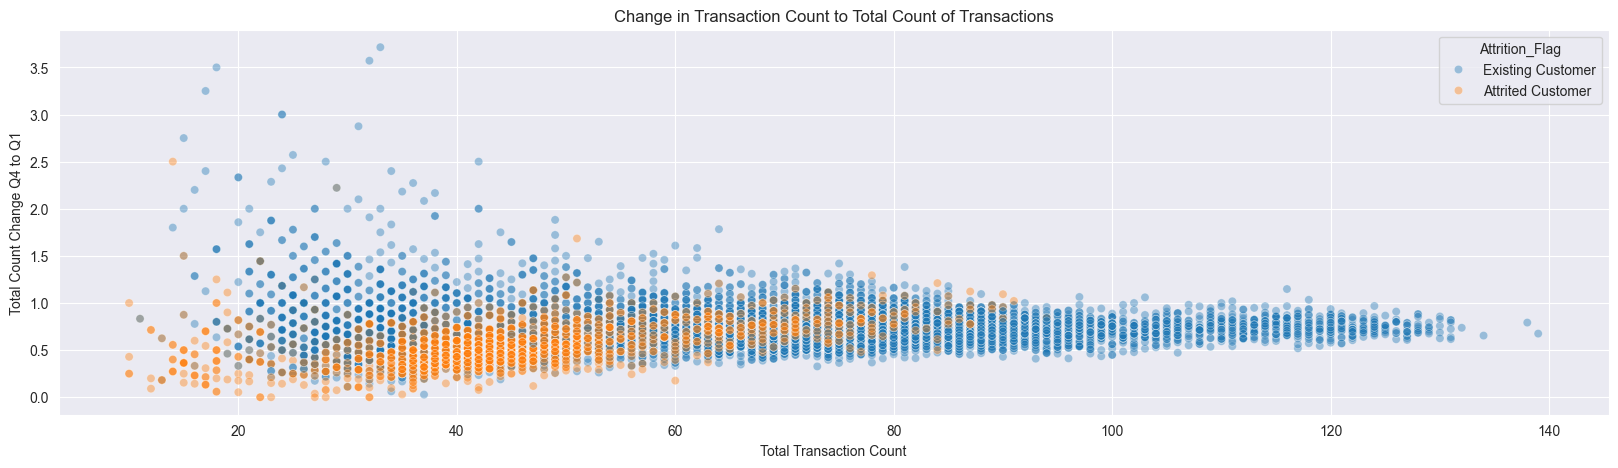

In [242]:
ct_chng = sns.scatterplot(data=df, x='Total_Trans_Ct', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', alpha=0.4)
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Count Change Q4 to Q1")
plt.title("Change in Transaction Count to Total Count of Transactions")
plt.show()

In [52]:
def total_trans_ct_group(row):
    if row < 50:
        result = '0 - 49 Transactions'
    elif row < 100:
        result = '50 - 99 Transactions'
    else:
        result = '100+ Transactions'
    return result
df['total_trans_ct_group'] = df['Total_Trans_Ct'].apply(total_trans_ct_group)
df.groupby('total_trans_ct_group')['Attrition_Binary'].mean()

total_trans_ct_group
0 - 49 Transactions     0.379980
100+ Transactions       0.000000
50 - 99 Transactions    0.073872
Name: Attrition_Binary, dtype: float64

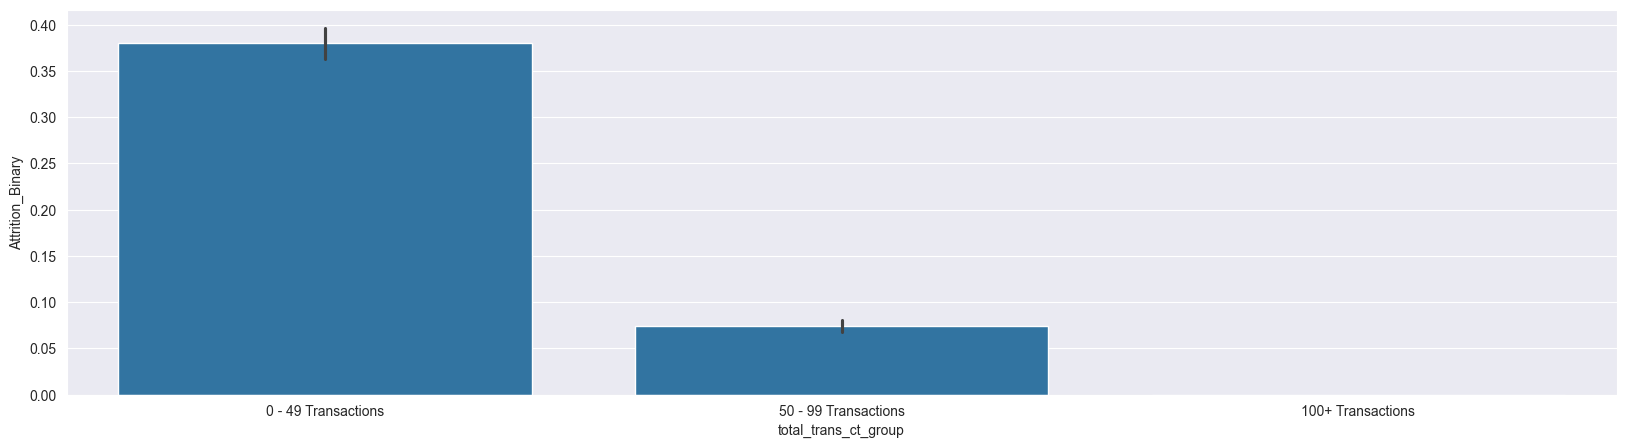

In [53]:
trans_ct = sns.barplot(data=df, x='total_trans_ct_group', y='Attrition_Binary')

Those with transaction counts between 0 - 49 are attriting at ~37%.

In [54]:
df['total_trans_ct_bin'] = pd.cut(df['Total_Trans_Ct'], 
                                         bins=np.arange(0, 200, 20), 
                                         labels=[0, 20, 40, 60, 80, 100, 120, 140, 160],
                                         include_lowest=True)
df[['total_trans_ct_bin', 'Total_Trans_Ct']].head()

,total_trans_ct_bin,Total_Trans_Ct
CLIENTNUM,,
768805383,40,42
818770008,20,33
713982108,0,20
769911858,0,20
709106358,20,28


In [55]:
df['total_ct_chng_bin'] = pd.cut(df['Total_Ct_Chng_Q4_Q1'], 
                                         bins=np.arange(0.0, 5, .5), 
                                         labels=[0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                                         include_lowest=True)
df[['total_ct_chng_bin', 'Total_Ct_Chng_Q4_Q1']].head()

,total_ct_chng_bin,Total_Ct_Chng_Q4_Q1
CLIENTNUM,,
768805383,1.5,1.625
818770008,3.5,3.714
713982108,2.0,2.333
769911858,2.0,2.333
709106358,2.0,2.500


In [56]:
xxx = pd.crosstab(df['total_ct_chng_bin'], df['total_trans_ct_bin'], values=df['Attrition_Binary'], aggfunc='mean')
xxx

total_trans_ct_bin,0,20,40,60,80,100,120
total_ct_chng_bin,,,,,,,
0.0,0.931034,0.517595,0.588235,0.040698,0.026316,0.0,NaN
0.5,0.589744,0.187019,0.318722,0.058154,0.013129,0.0,0.0
1.0,0.375000,0.033898,0.058480,0.072917,0.171429,0.0,NaN
1.5,0.000000,0.000000,0.076923,0.000000,NaN,NaN,NaN
2.0,0.200000,0.090909,0.000000,NaN,NaN,NaN,NaN
2.5,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


There's a direct correlation to attrition with low transaction counts.

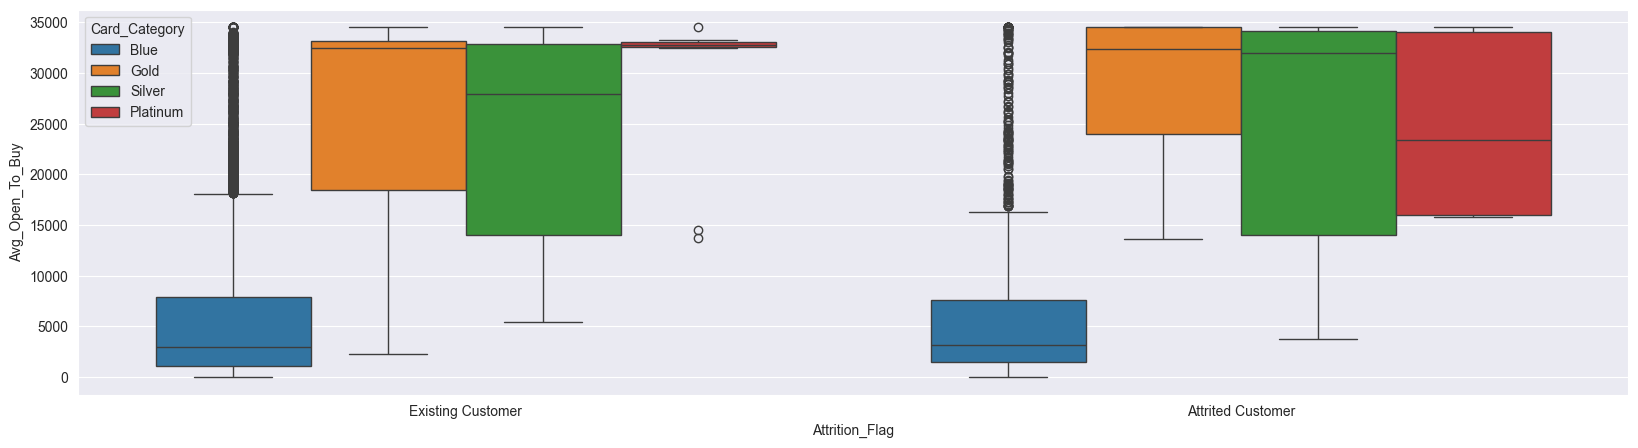

In [57]:
avg_open = sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Open_To_Buy', hue='Card_Category')

Average availability in credit limit doesn't contribute to attrition except for those with platinum cards.

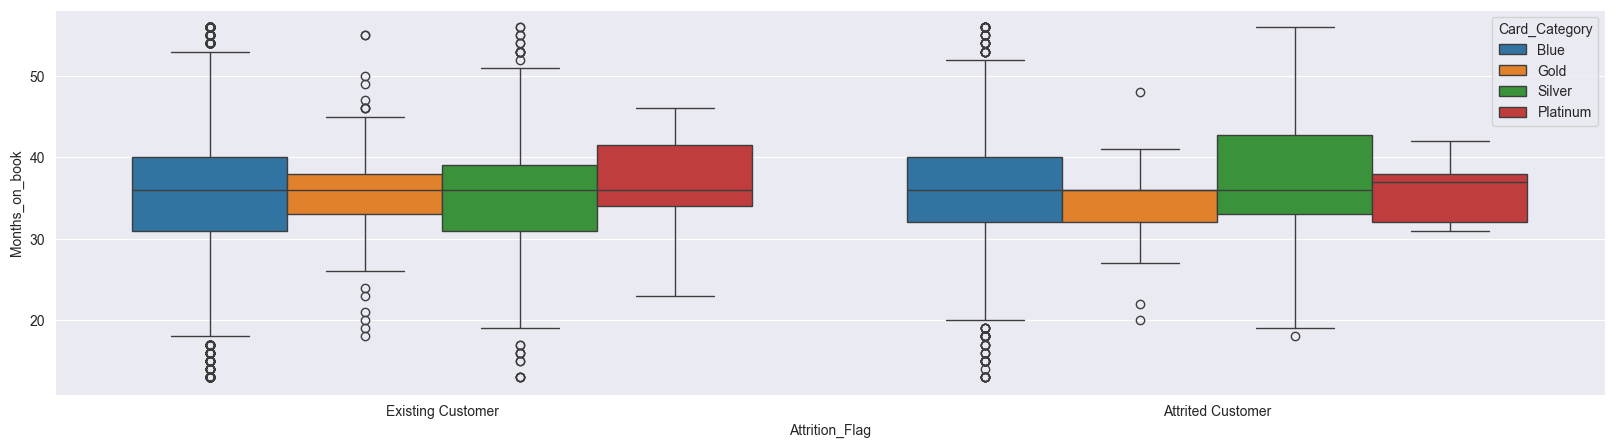

In [58]:
months_cust = sns.boxplot(data=df, x='Attrition_Flag', y='Months_on_book', hue='Card_Category')

Number of months working with the bank doesn't contribute to attrition either.

In [59]:
def months_on_book_group(row):
    if row < 25:
        result = '12 - 24 months'
    elif row < 37:
        result = '25 - 36 months'
    else:
        result = 'More than 36 months'
    return result
df['Months_on_book_group'] = df['Months_on_book'].apply(months_on_book_group)
df.groupby('Months_on_book_group')['Attrition_Binary'].mean()

Months_on_book_group
12 - 24 months         0.148760
25 - 36 months         0.160760
More than 36 months    0.163128
Name: Attrition_Binary, dtype: float64

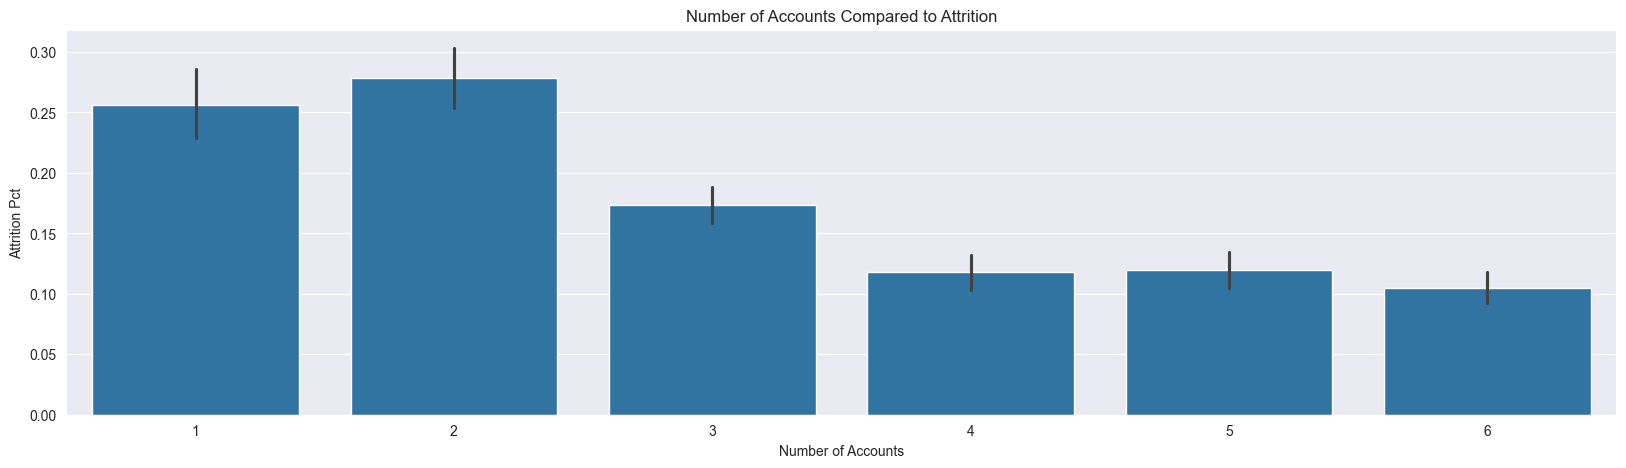

In [60]:
total_relat = sns.barplot(data=df, x='Total_Relationship_Count', y='Attrition_Binary')
plt.xlabel("Number of Accounts")
plt.ylabel("Attrition Pct")
plt.title("Number of Accounts Compared to Attrition")
plt.show()

Those with less accounts open with the bank are attriting at higher percent.

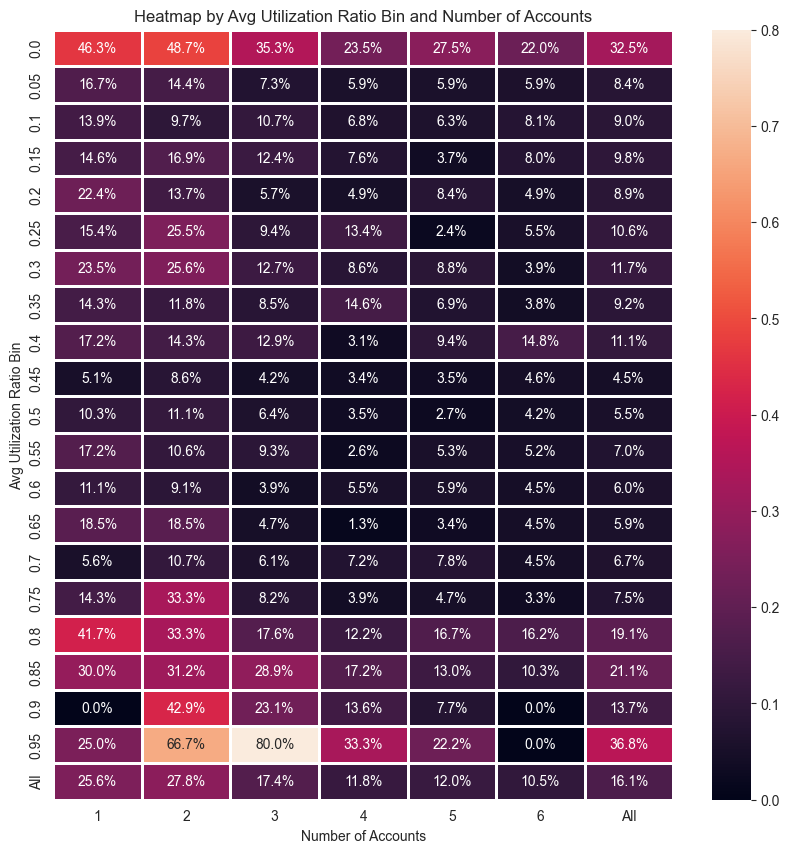

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
a = pd.crosstab(df['Avg_Utilization_Ratio_Bin'], df['Total_Relationship_Count'],
                df['Attrition_Binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Avg Utilization Ratio Bin')
plt.xlabel('Number of Accounts')
plt.title('Heatmap by Avg Utilization Ratio Bin and Number of Accounts')
plt.show()

Number of accounts open with the bank are a major contributing factor regarding attrition. Utilization of those accounts is once again a factor to be analyzed. Number of accounts between 1 - 3 with low or high utlization need to be prioritized.

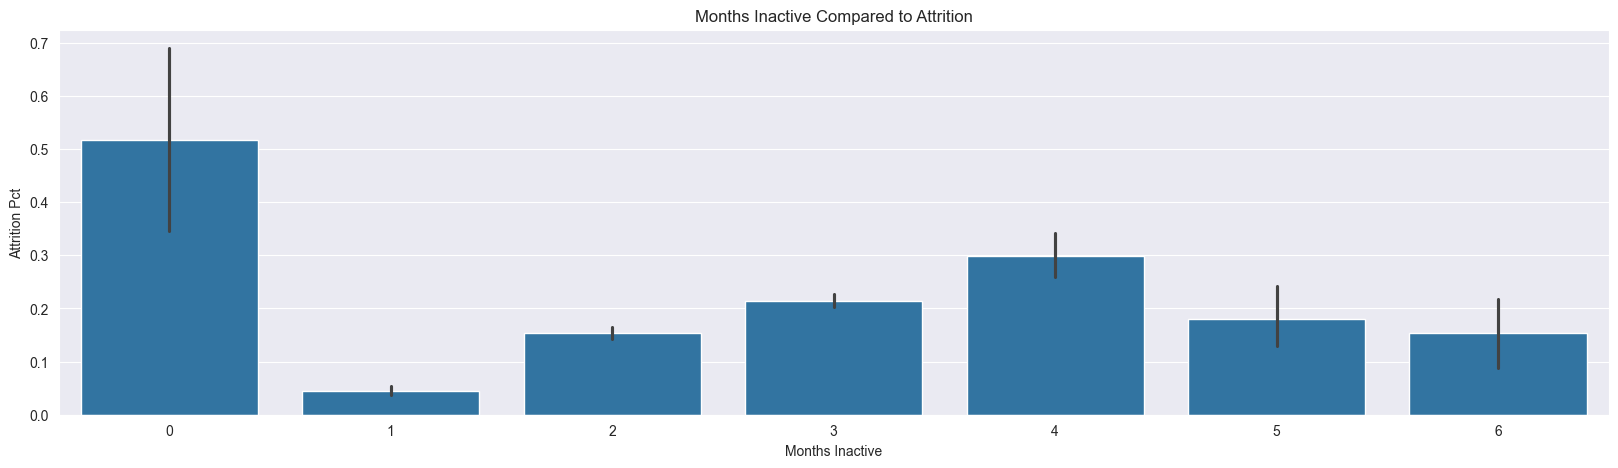

In [62]:
months_inactive = sns.barplot(data=df, x='Months_Inactive_12_mon', y='Attrition_Binary')
plt.xlabel("Months Inactive")
plt.ylabel("Attrition Pct")
plt.title("Months Inactive Compared to Attrition")
plt.show()

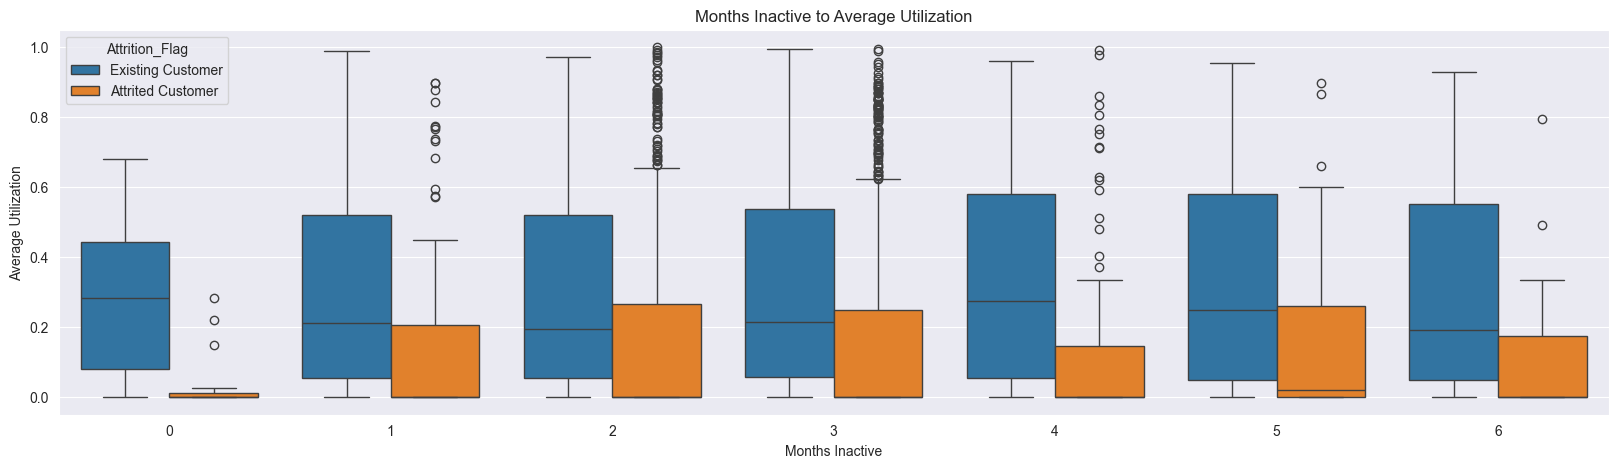

In [63]:
inactive_bal = sns.boxplot(data=df, x='Months_Inactive_12_mon', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.xlabel("Months Inactive")
plt.ylabel("Average Utilization")
plt.title("Months Inactive to Average Utilization")
plt.show()

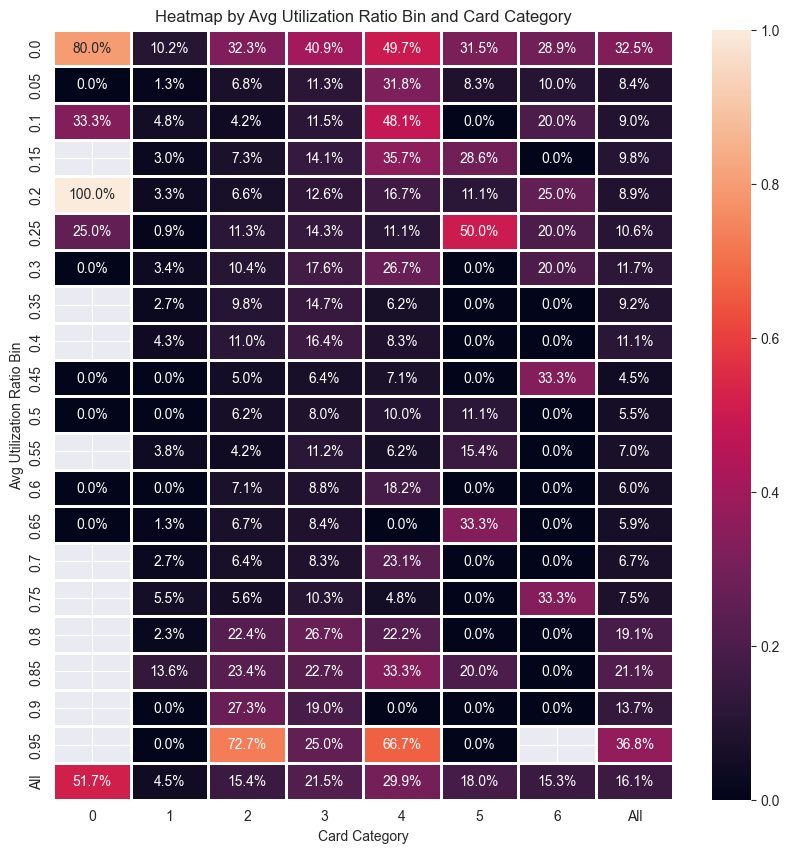

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
a = pd.crosstab(df['Avg_Utilization_Ratio_Bin'], df['Months_Inactive_12_mon'],
                df['Attrition_Binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Avg Utilization Ratio Bin')
plt.xlabel('Card Category')
plt.title('Heatmap by Avg Utilization Ratio Bin and Card Category')
plt.show()

Inactivity between 0 - 4 months with low and high utlization should be a another focus for the bank.

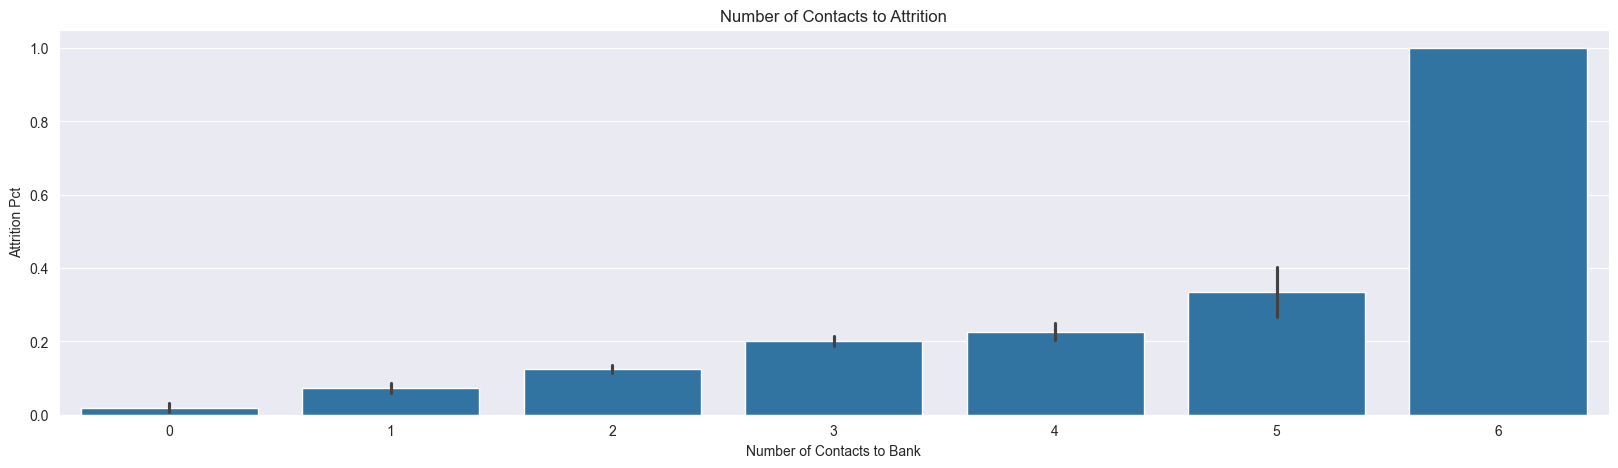

In [65]:
contacts_count = sns.barplot(data=df, x='Contacts_Count_12_mon', y='Attrition_Binary')
plt.xlabel("Number of Contacts to Bank")
plt.ylabel("Attrition Pct")
plt.title("Number of Contacts to Attrition")
plt.show()

Those contacting the bank more often are attriting at a high percentage.

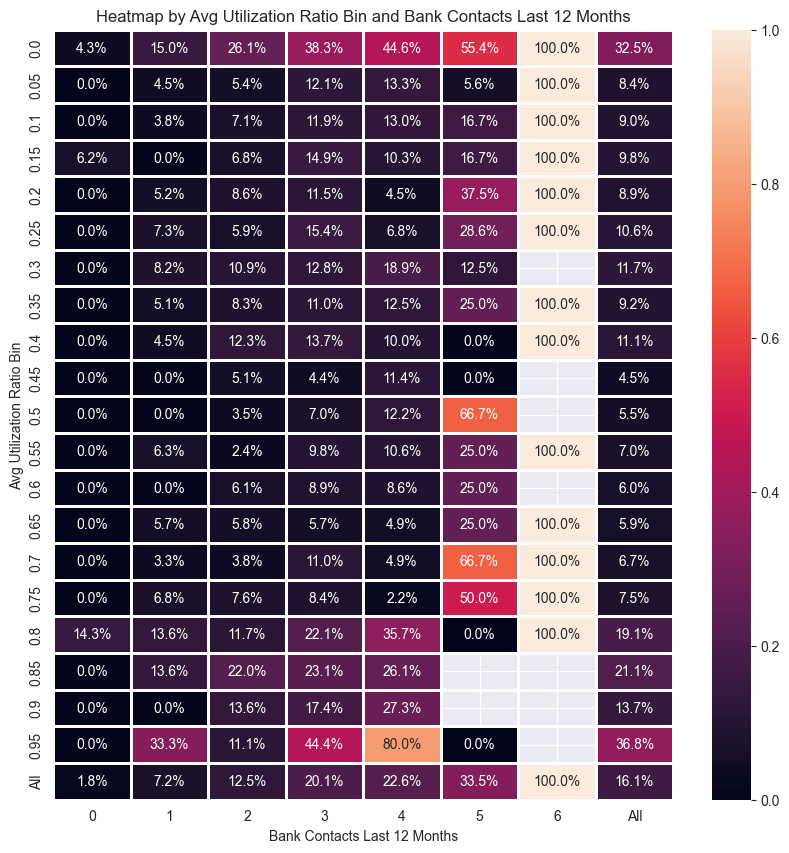

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
a = pd.crosstab(df['Avg_Utilization_Ratio_Bin'], df['Contacts_Count_12_mon'],
                df['Attrition_Binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Avg Utilization Ratio Bin')
plt.xlabel('Bank Contacts Last 12 Months')
plt.title('Heatmap by Avg Utilization Ratio Bin and Bank Contacts Last 12 Months')
plt.show()

Those contacting the bank at least 6 times regardless of utilization are attriting at 100%. Prioriting efforts to improve client retention with banks contacts of 4+ times needs to be a focus.

<Axes: >

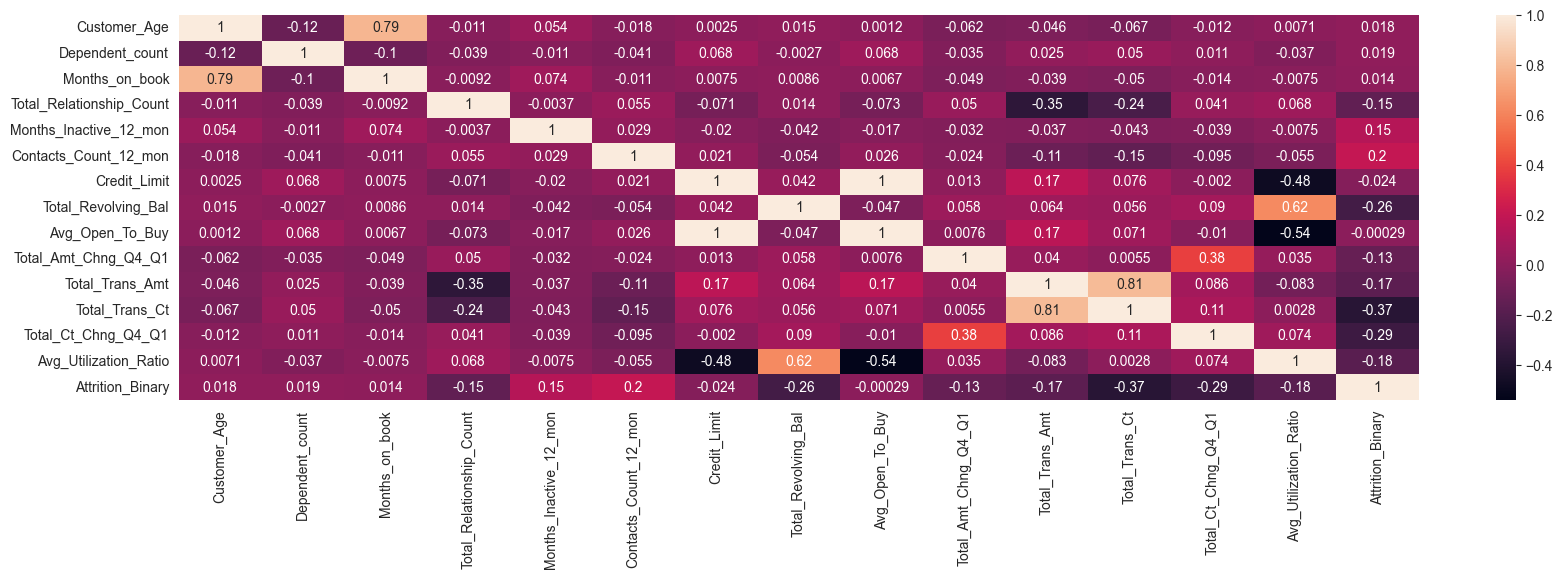

In [67]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

# Recommendations

1. Contacting blue card holders with low and high utilization to offer an additional credit limit/line
2. Contacting those with transaction amounts of 0 - 10000 to make them aware of card benefits
3. Contacting those with 0 - 49 transactions to see how they can better utilze their card
4. Contacting those with 1 - 3 open accounts with the bank to ensure customer satisfaction and potential expansion to increase customer satisfaction
5. Contacting customers with inactivity between 0 - 4 months and low/high utlization
6. Revist customer retention strategies to ensure professional and problem-solving tactics are being implemented to resolve customer concerns